<H1>MADATORY PYTHON LIBRARIES</H1>

In [80]:
import xarray
import pandas as pd
import folium
import os
import numpy as np
from folium import plugins
%matplotlib  inline

<h1>IN SITU DRIFTERS</h1>

In Situ 'drifters' comprehends a 2 kinds of drifting buoys: drifting buoys reporting currents (DC) and drifting buoys (DB). These moving platforms provides data time series of certain parameters along its trajectory/over time. It's platform data sources are: DB & DC.

## 1. In Situ netCDF

Imagine you have downloaded some <i>_TS_ (time serie)</i> dataset from In Situ drifters (see how to download files from a  certain [platform data source](https://github.com/CopernicusMarineInsitu/INSTACTraining-Phase2UPDATE/blob/master/PythonNotebooks/In_Situ_data_download_by_platform_data_source.ipynb) or [platform category](https://github.com/CopernicusMarineInsitu/INSTACTraining-Phase2UPDATE/blob/master/PythonNotebooks/In_Situ_data_download_by_platform_category.ipynb)) like: [MO_TS_DC_0-2820800.nc](ftp://nrt.cmems-du.eu/Core/INSITU_MED_NRT_OBSERVATIONS_013_035/history/drifter/MO_TS_DC_0-2820800.nc)

In [81]:
dataset = 'MO_TS_DC_0-2820800.nc'

Let's have a look to its content:

In [82]:
full_path2file = os.getcwd()+'/'+dataset #default to current directory
print('path2file: %s'%(full_path2file))

path2file: /home/protllan/code/Training/INSTACTraining-PhaseII/PythonNotebooks/MO_TS_DC_0-2820800.nc


In [83]:
ds = xarray.open_dataset(dataset)

ds contains all the information about the dataset (relevant metadata, variables, dimensions etc):

In [84]:
ds

<xarray.Dataset>
Dimensions:          (DEPTH: 1, LATITUDE: 142, LONGITUDE: 142, POSITION: 142, TIME: 142)
Coordinates:
  * LONGITUDE        (LONGITUDE) float64 9.715 9.723 9.73 9.741 9.756 9.768 ...
  * LATITUDE         (LATITUDE) float64 43.83 43.83 43.82 43.82 43.81 43.81 ...
  * TIME             (TIME) datetime64[ns] 2017-09-26T15:00:00 ...
Dimensions without coordinates: DEPTH, POSITION
Data variables:
    EWCT             (TIME, DEPTH) float64 10.0 0.05808 0.06806 0.09422 ...
    NSCT             (TIME, DEPTH) float64 10.0 -0.07387 -0.05337 -0.03517 ...
    DEPH             (TIME, DEPTH) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TIME_QC          (TIME) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    EWCT_QC          (TIME, DEPTH) float64 4.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    NSCT_QC          (TIME, DEPTH) float64 4.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    DEPH_QC          (TIME, DEPTH) float64 7.0 7.0 7.0 7.0 7.0 7.0 7.0 7.0 ...
    POSITION_QC      (POSITION) float64

In [85]:
ds.variables.keys()

[u'LONGITUDE',
 u'LATITUDE',
 u'TIME',
 u'EWCT',
 u'NSCT',
 u'DEPH',
 u'TIME_QC',
 u'EWCT_QC',
 u'NSCT_QC',
 u'DEPH_QC',
 u'POSITION_QC',
 u'EWCT_DM',
 u'NSCT_DM',
 u'DEPH_DM',
 u'DROGUE_PRESENCE']

Every of the above parameters varies along certain dimensions (within parenthesis when checking the parameter metadata):

In [86]:
ds['LATITUDE']

<xarray.DataArray 'LATITUDE' (LATITUDE: 142)>
array([ 43.834084,  43.826336,  43.819721,  43.81596 ,  43.812881,  43.807896,
        43.807041,  43.799366,  43.775936,  43.746105,  43.723782,  43.711159,
        43.70813 ,  43.710346,  43.711716,  43.720608,  43.72868 ,  43.734245,
        43.740459,  43.752243,  43.760128,  43.757561,  43.752071,  43.750095,
        43.742977,  43.7276  ,  43.71653 ,  43.709187,  43.697643,  43.676819,
        43.652836,  43.631584,  43.596386,  43.568653,  43.544025,  43.513401,
        43.480167,  43.447044,  43.415894,  43.387951,  43.373196,  43.367912,
        43.362961,  43.363979,  43.375019,  43.389091,  43.40419 ,  43.415527,
        43.420174,  43.417522,  43.420837,  43.432312,  43.44326 ,  43.451431,
        43.45639 ,  43.455784,  43.447483,  43.431911,  43.416157,  43.405838,
        43.386341,  43.365253,  43.345589,  43.328152,  43.314831,  43.299995,
        43.281975,  43.267632,  43.255585,  43.246117,  43.238102,  43.229069,
      

Every of the above variables have a corresponding '_QC' variable, which is the variable that contains the data quality flags:

In [87]:
ds['POSITION_QC']

<xarray.DataArray 'POSITION_QC' (POSITION: 142)>
array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.])
Dimensions without coordinates: POSITION
Attributes:
    long_name:      quality flag
    conventions:    OceanSITES reference table 2
    valid_min:      0
    va

This '_QC' variable will therefore guide us when when working with the parameter data to distinguish good from bad data: 

In [88]:
pd.DataFrame(data=ds['POSITION_QC'].attrs['flag_values'], index = ds['POSITION_QC'].attrs['flag_meanings'].split(' '), columns = ['quality flag'])

,quality flag
no_qc_performed,0
good_data,1
probably_good_data,2
bad_data_that_are_potentially_correctable,3
bad_data,4
value_changed,5
not_used,6
nominal_value,7
interpolated_value,8
missing_value,9


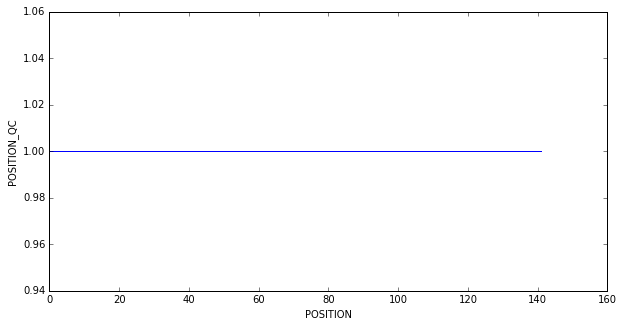

In [89]:
ds['POSITION_QC'].plot(aspect=2, size=5)

In this case, all positions are considered 'good' so we skip any further data selection to overlook not-good data.

## 2. Animating a drfiter trajectory with folium

In [90]:
lats = ds['LATITUDE'].values.tolist()
lons = ds['LONGITUDE'].values.tolist()
times = ds['TIME'].values.tolist()

In [91]:
mean_lat = np.mean(lats)
mean_lon = np.mean(lons)

In [92]:
drifter = {
    'type': 'Feature',
    'geometry': {
        'type': 'LineString',
        'coordinates': []
    },
    'properties': {
        'times': [],
        'variable': []
    }
}

In [93]:
for time, lat, lon in zip(times, lats, lons) :
    unix_timestamp = int(str(time)[:13])
    drifter['properties']['times'].append(unix_timestamp)
    drifter['geometry']['coordinates'].append([lon,lat])

In [94]:
map = folium.Map(location=[mean_lat, mean_lon], zoom_start=7)
marker = plugins.TimestampedGeoJson({
    'type': 'FeatureCollection',
    'features': [drifter],
}, period='PT1H', add_last_point=True, loop=False).add_to(map)
map